Content Rating with highest installs: Everyone
Total installs for this rating: 114156659621.0
Number of categories for this rating: 33


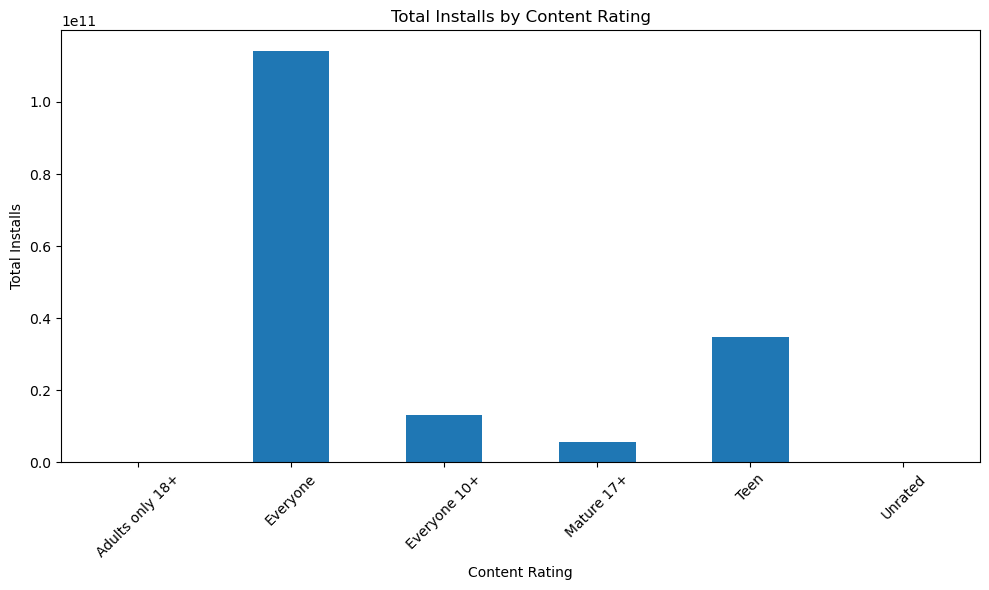

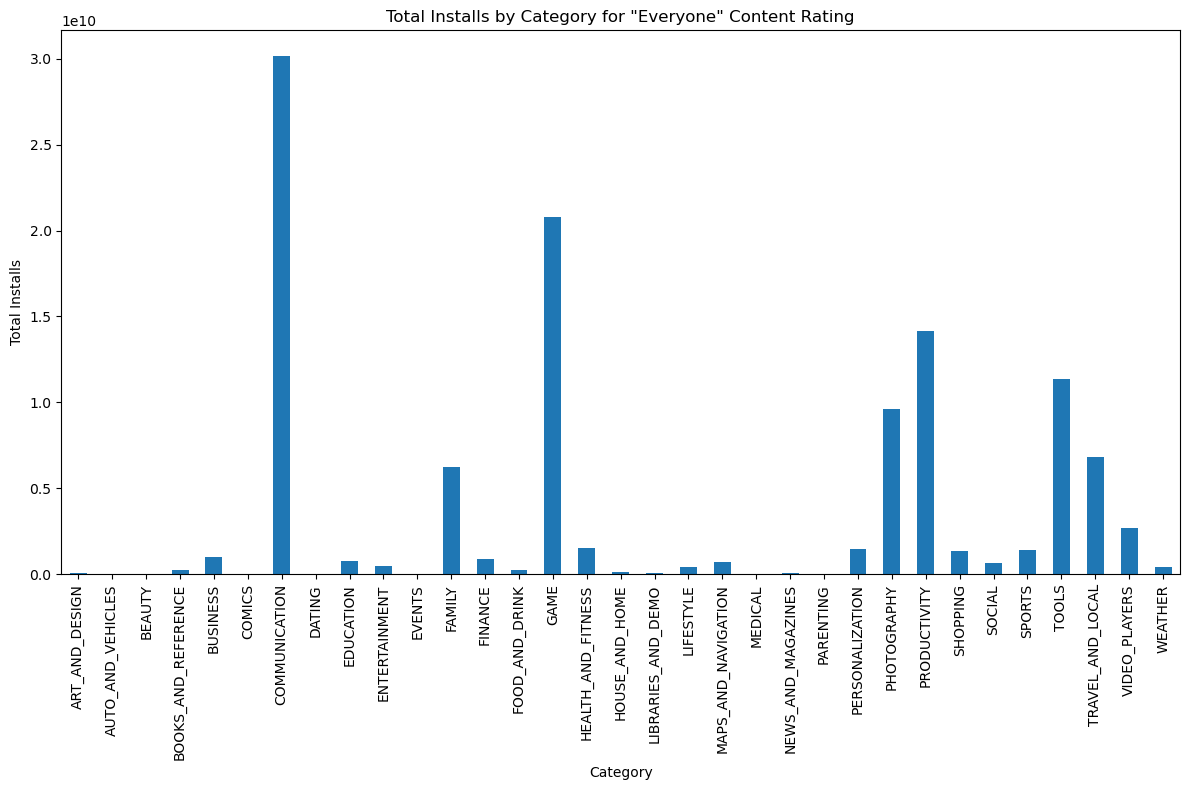

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'googleplaystoremaster.csv'
data = pd.read_csv(file_path)

# Select required columns
data_subset = data[['Category', 'Content Rating', 'Installs']].copy()

# Clean the 'Installs' column by handling non-numeric values and converting to integers
data_subset['Installs'] = pd.to_numeric(data_subset['Installs'].replace('Free', None).replace('[+,]', '', regex=True))

# Drop rows with NaN in 'Installs'
data_subset.dropna(subset=['Installs'], inplace=True)

# Group by 'Content Rating' and 'Category' to sum installs
install_summary = data_subset.groupby(['Content Rating', 'Category'])['Installs'].sum().reset_index()

# Find content rating with highest installs and associated category count
highest_installs_by_content_rating = install_summary.groupby('Content Rating')['Installs'].sum().idxmax()
highest_installs_value = install_summary.groupby('Content Rating')['Installs'].sum().max()
num_categories_for_highest_installs = install_summary[install_summary['Content Rating'] == highest_installs_by_content_rating]['Category'].nunique()

# Print results
print(f"Content Rating with highest installs: {highest_installs_by_content_rating}")
print(f"Total installs for this rating: {highest_installs_value}")
print(f"Number of categories for this rating: {num_categories_for_highest_installs}")

# Sum installs by content rating
content_rating_installs = data_subset.groupby('Content Rating')['Installs'].sum()

# Sum installs by category within 'Everyone' content rating
everyone_category_installs = install_summary[install_summary['Content Rating'] == 'Everyone'].groupby('Category')['Installs'].sum()

# Plot total installs by content rating
plt.figure(figsize=(10, 6))
content_rating_installs.plot(kind='bar')
plt.title('Total Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot installs per category within 'Everyone' content rating
plt.figure(figsize=(12, 8))
everyone_category_installs.plot(kind='bar')
plt.title('Total Installs by Category for "Everyone" Content Rating')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
